<a href="https://colab.research.google.com/github/ritaritari/Margarita-Belozerova-HSE/blob/main/Belozerova_Margarita_DZ_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Домашнее задание
Базовый уровень:

удалить стоп-слова в корпусе текстов Шескпира, лемматизировать корпус (достаточно выбрать что-то одно);
заново обучить вектора;
найти сходства и различия между отдельными векторами;
визуализировать данные с помощью кода в заданных ячейках (можно просто перезапустить эти ячейки без изменений);
представить выводы о проделанной работы: удалось ли вам обнаружить связи после удаления стоп-слов, лемматизации?

### **Импорт библиотек**

In [3]:
import nltk
nltk.download('punkt') # ресурс для токенизации
nltk.download('wordnet') # ресурс для лемматизации
nltk.download('stopwords') # ресурс для извлечения списка стоп-слов

import spacy

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### **Загрузка корпуса текстов Шекспира**

In [1]:
!wget https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt

--2024-01-29 08:15:46--  https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1115394 (1.1M) [text/plain]
Saving to: ‘input.txt’

input.txt           100%[===================>]   1.06M  --.-KB/s    in 0.04s   

2024-01-29 08:15:46 (28.5 MB/s) - ‘input.txt’ saved [1115394/1115394]



In [2]:
# прописываем путь к файлу
file_path = 'input.txt'

# открываем файл для чтения ('r')
with open(file_path, 'r') as file:
    # записываем содержимое файла в переменную
    text_content = file.read()

# выведем на экран часть содержимого
text_content[:100]

'First Citizen:\nBefore we proceed any further, hear me speak.\n\nAll:\nSpeak, speak.\n\nFirst Citizen:\nYou'

### **Предобработка текста**

In [4]:
import re

def clean_text(text):
    # приводим текст к нижнему регистру
    text = text.lower()

    # удаляем все символы кроме букв
    text = re.sub(r'[^a-z\s]', '', text)

    # удаляем двойные пробелы
    text = re.sub(r'\s+', ' ', text).strip()

    return text

cleaned_text = clean_text(text_content)

# выведем на экран часть обработанного текста
cleaned_text[:100]

'first citizen before we proceed any further hear me speak all speak speak first citizen you are all '

### **Лемматизация**

In [12]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# токенизация
tokens = word_tokenize(cleaned_text)

# лемматизация: инициализация WordNetLemmatizer и извлечение лемм
lemmatizer = WordNetLemmatizer()
lemmatized_text = [lemmatizer.lemmatize(word) for word in tokens]

print("Наш текст:", cleaned_text)
print("Леммы:", lemmatized_text)

Наш текст: first citizen before we proceed any further hear me speak all speak speak first citizen you are all resolved rather to die than to famish all resolved resolved first citizen first you know caius marcius is chief enemy to the people all we knowt we knowt first citizen let us kill him and well have corn at our own price ist a verdict all no more talking ont let it be done away away second citizen one word good citizens first citizen we are accounted poor citizens the patricians good what authority surfeits on would relieve us if they would yield us but the superfluity while it were wholesome we might guess they relieved us humanely but they think we are too dear the leanness that afflicts us the object of our misery is as an inventory to particularise their abundance our sufferance is a gain to them let us revenge this with our pikes ere we become rakes for the gods know i speak this in hunger for bread not in thirst for revenge second citizen would you proceed especially agai

### **Обучение**

# ***Новые результаты***

In [13]:
from gensim.models import Word2Vec

# задаем параметры нашей модели
model = Word2Vec(sentences=[lemmatized_text], vector_size=150, window=5, min_count=1, workers=4)

### **№1**

In [19]:
# выведем результат обучения модели
model.wv['love']

array([-0.00838222, -0.03856767,  0.01207368,  0.00371001, -0.01803417,
       -0.08317006,  0.00274622,  0.1170423 , -0.06551957,  0.0310532 ,
        0.07614692,  0.0089799 , -0.07314482,  0.05766611, -0.06305934,
       -0.04610355,  0.10436099, -0.09885696, -0.0294861 ,  0.00851533,
       -0.02719639,  0.01373215,  0.06602646,  0.07032284,  0.01658132,
       -0.0401764 , -0.15094073,  0.04071413, -0.06405503, -0.12039766,
        0.00371808,  0.06410659, -0.09238779, -0.05590355, -0.00840288,
        0.05775141,  0.12024333, -0.01267557,  0.07784078, -0.06080832,
       -0.07002564, -0.00470479, -0.10212313, -0.07478936,  0.07133932,
       -0.00264472, -0.0500578 , -0.02616332,  0.03000529,  0.14702421,
       -0.03661133,  0.07880228, -0.0294095 , -0.05880901,  0.07996201,
        0.01037855,  0.04005525,  0.09408765,  0.06717028,  0.04767875,
       -0.01167864, -0.10280851,  0.02331232, -0.05616646,  0.01137541,
        0.0380069 ,  0.02586802, -0.05235396, -0.16668575, -0.08

In [20]:
model.wv.most_similar(["love"])

[('marcius', 0.9983721375465393),
 ('to', 0.9983303546905518),
 ('their', 0.9983205199241638),
 ('with', 0.9982938170433044),
 ('they', 0.9982839822769165),
 ('we', 0.998272716999054),
 ('and', 0.9982578754425049),
 ('a', 0.9982415437698364),
 ('you', 0.9982378482818604),
 ('the', 0.998232364654541)]

In [21]:

model.wv.similarity('love', 'hate')

0.9927042

In [22]:
model.wv.similarity('love', 'like')

0.99687266

In [23]:

model.wv.doesnt_match(['love', 'like', 'hate'])

'hate'

### **№2**

In [29]:
# выведем результат обучения модели
model.wv['friend']

array([-0.01171752, -0.02262617,  0.01339881,  0.00418885, -0.01835729,
       -0.05739018, -0.00669829,  0.07745603, -0.04714037,  0.02082635,
        0.04037181,  0.00899773, -0.04283845,  0.03979427, -0.03268918,
       -0.03291099,  0.06864014, -0.06865998, -0.01088796,  0.00142653,
       -0.01772082,  0.01148676,  0.03650793,  0.04335245,  0.00333507,
       -0.02687585, -0.10170158,  0.02788761, -0.03961641, -0.07759503,
       -0.00163105,  0.03416288, -0.06146462, -0.0286371 , -0.01205909,
        0.03551818,  0.08474628, -0.0049853 ,  0.05641902, -0.04674478,
       -0.05401568, -0.00353019, -0.06457655, -0.05215675,  0.05068995,
       -0.00292216, -0.0317985 , -0.01849835,  0.02397378,  0.08785544,
       -0.02370538,  0.04725319, -0.02167912, -0.03219479,  0.05376112,
        0.009355  ,  0.02358618,  0.05904504,  0.03774891,  0.02466263,
       -0.0157673 , -0.0666629 ,  0.01769367, -0.03962394,  0.00933081,
        0.02297336,  0.01397934, -0.03292904, -0.10604321, -0.05

In [30]:
model.wv.most_similar(["friend"])

[('you', 0.9963247776031494),
 ('their', 0.9963014721870422),
 ('your', 0.99629807472229),
 ('them', 0.9962589740753174),
 ('i', 0.9962496161460876),
 ('marcius', 0.9962221384048462),
 ('yet', 0.9962155222892761),
 ('to', 0.996194064617157),
 ('and', 0.9961879849433899),
 ('than', 0.9961843490600586)]

In [31]:

model.wv.similarity('friend', 'enemy')

0.98827887

In [32]:
model.wv.similarity('friend', 'companion')

0.069776915

In [33]:

model.wv.doesnt_match(['friend', 'companion', 'enemy'])

'companion'

### **Сравнение с результатами прошлого семинара**

In [35]:
# выведем результат обучения модели
model.wv['king']

array([ 0.00169671, -0.00260004,  0.00363258,  0.005855  ,  0.00255028,
       -0.00546954,  0.00527101,  0.00499542, -0.0012013 ,  0.00589557,
        0.00245454, -0.00182098, -0.00244562,  0.00957664, -0.01156859,
       -0.00361044,  0.00904873, -0.00865416,  0.00265016, -0.00468339,
        0.00441372, -0.00507822,  0.00977675,  0.01272791, -0.00145771,
       -0.00984994, -0.00905376, -0.00225056, -0.01066341, -0.01090342,
       -0.00381671,  0.01102587, -0.00232732, -0.00426531,  0.00418007,
        0.0110827 ,  0.01467551,  0.00164474,  0.01109856, -0.00155155,
       -0.00362402,  0.00365059, -0.01344626, -0.00071832,  0.01186568,
        0.0057575 , -0.0108024 , -0.00487072,  0.00289466,  0.01538658,
       -0.00895915,  0.0071433 ,  0.00153171,  0.001138  ,  0.00555032,
        0.00185362,  0.00832292,  0.00696881,  0.007124  , -0.00213541,
       -0.00107087, -0.00566717,  0.00449471, -0.01200859, -0.00198563,
        0.00518387,  0.00278341, -0.00800007, -0.01078351, -0.00

In [36]:
model.wv.most_similar(["king"])

[('general', 0.8365749716758728),
 ('soldier', 0.8351200222969055),
 ('lady', 0.8348181843757629),
 ('set', 0.8343967795372009),
 ('hate', 0.8337750434875488),
 ('now', 0.8336917161941528),
 ('fourth', 0.8335440158843994),
 ('think', 0.832784116268158),
 ('sir', 0.8326642513275146),
 ('lartius', 0.8323221802711487)]

In [37]:

model.wv.similarity('king', 'queen')

-3.7062353e-05

In [39]:
model.wv.similarity('king', 'prince')

0.1355398

In [51]:

model.wv.doesnt_match(['king', 'prince', 'queen'])

'queen'

### **Визуализация**

In [41]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')

from sklearn.decomposition import PCA

In [54]:
def pca_scatterplot(model, words=None, sample=0):
  word_vectors = [model.wv[w] for w in words]
  # сократить размерность векторов до 2D
  vectors_2d = PCA().fit_transform(word_vectors)
  # отрисовка изображения, задаем размер 12 на 10
  plt.figure(figsize=(12,10))
  # задаем цвет точек и ссылаемся на данные по осям x (0) и y (1)
  plt.scatter(vectors_2d[:,0], vectors_2d[:,1], c='g')
  # добавляем подписи к данным, проходимся по списку слов
  for i, word in enumerate(words):
    # соотносим слово с его двухмерным вектором
    plt.annotate(word, (vectors_2d[i, 0], vectors_2d[i, 1]))

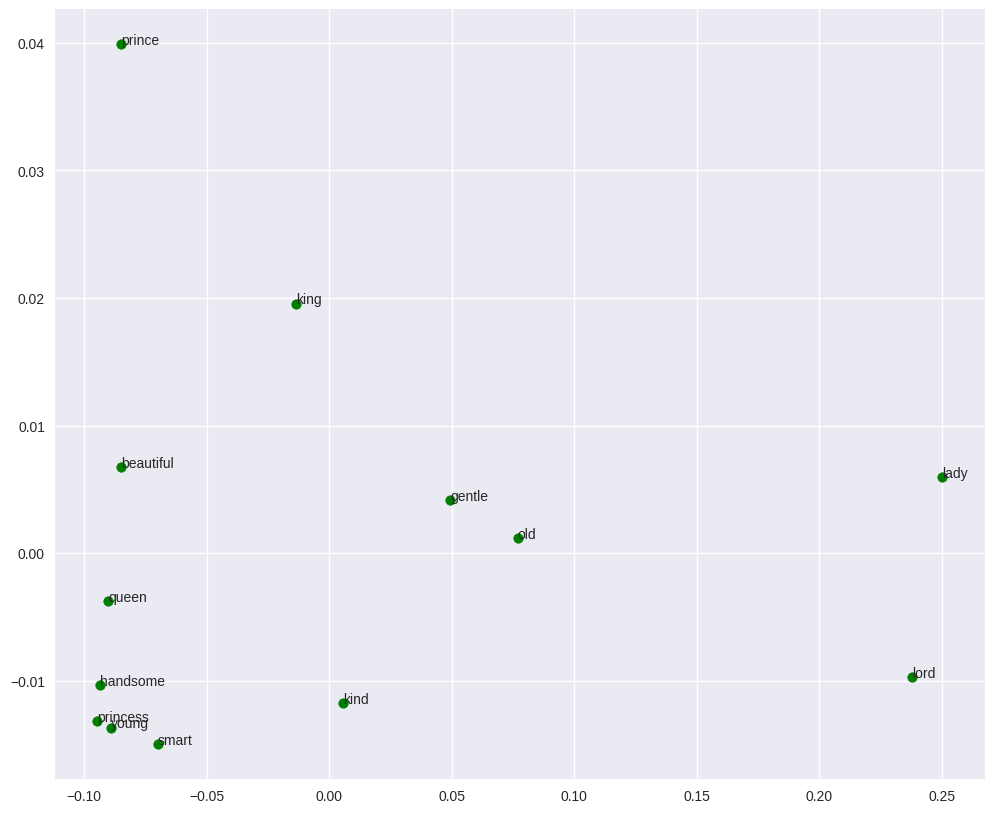

In [55]:
pca_scatterplot(model, ['smart', 'handsome', 'beautiful', 'kind', 'gentle', 'old', 'young',
                                'prince', 'princess', 'lady', 'king', 'queen', 'lord'])

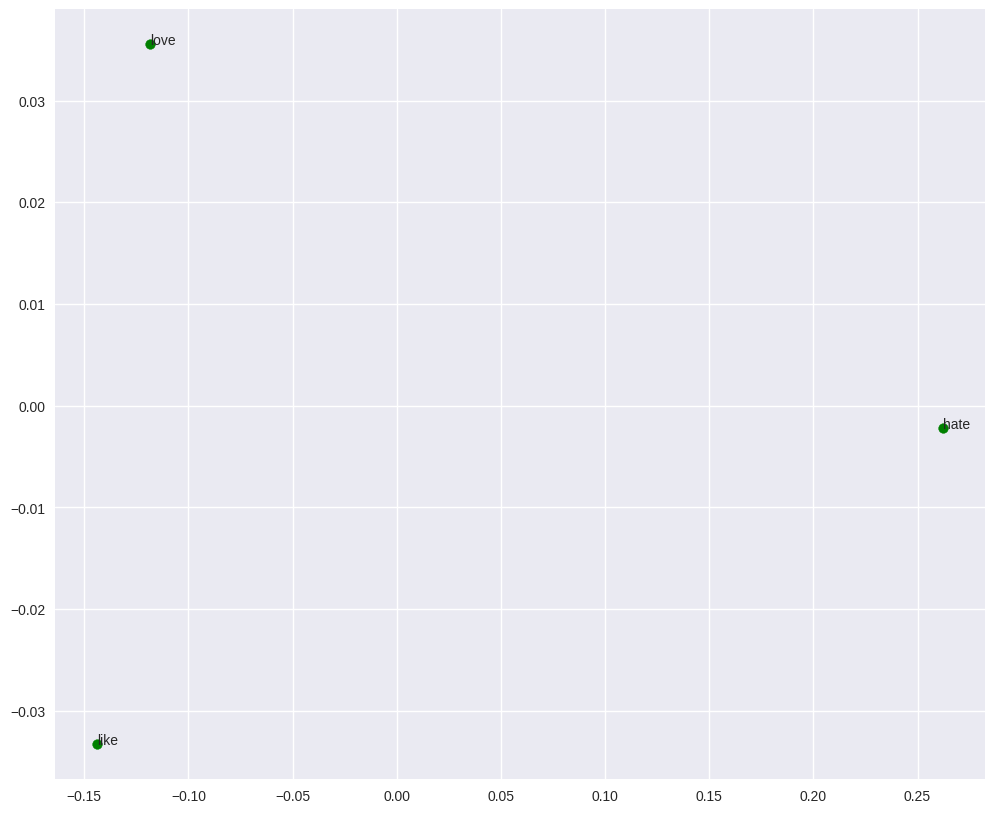

In [44]:
pca_scatterplot(model, ['love', 'hate', 'like'])

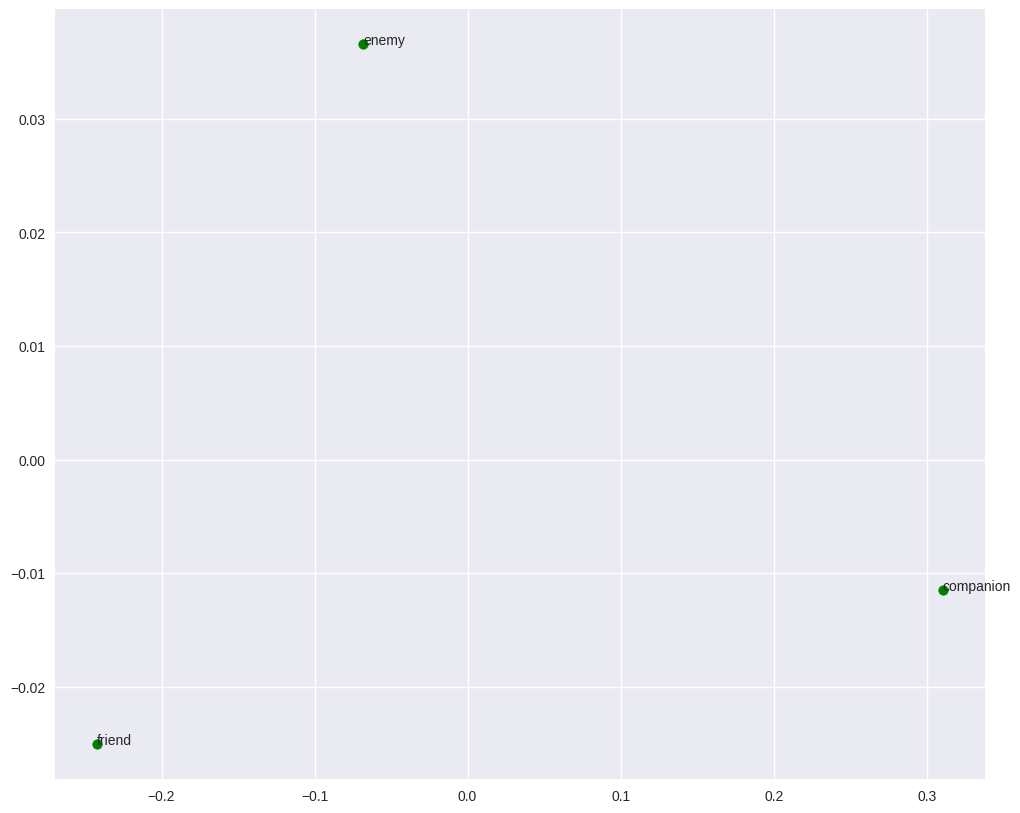

In [46]:
pca_scatterplot(model, ['friend', 'companion', 'enemy'])

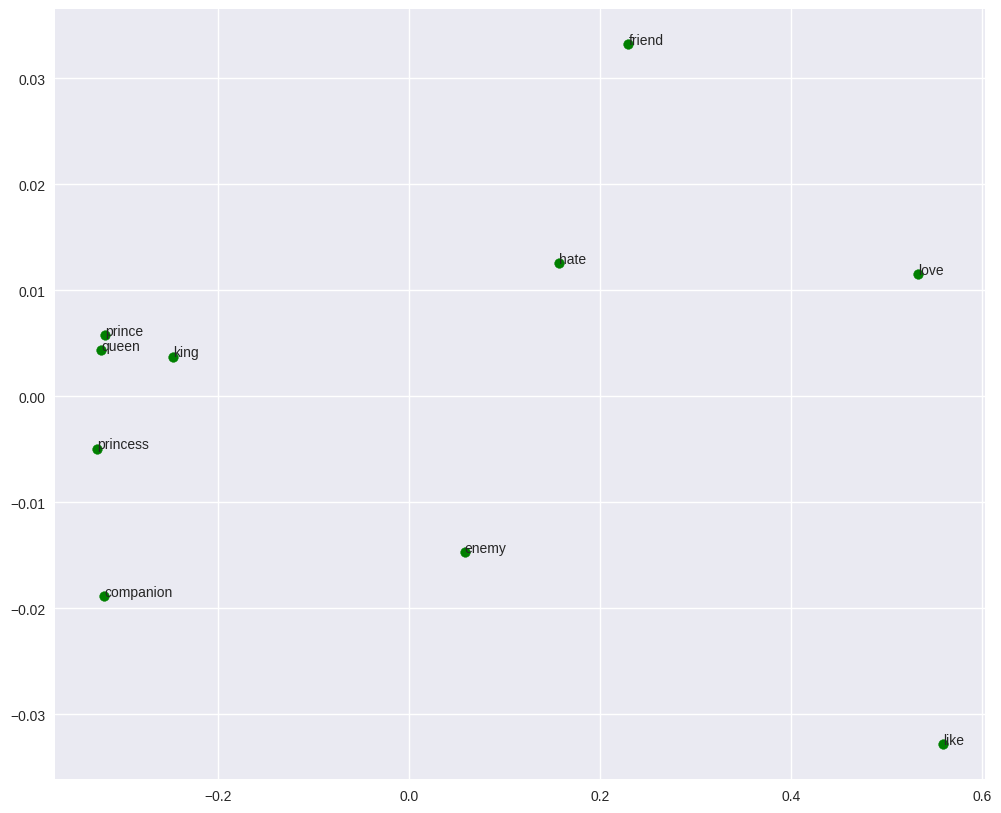

In [50]:
pca_scatterplot(model, ['prince', 'princess', 'king', 'queen', 'friend', 'companion', 'enemy', 'love', 'like', 'hate'])

### **Выводы**

После лемматизации модель, кажется, что модель с большей точностью определяет разницу между словами. Например, у меня получилось, что слова *'king'* и *'queen'* сильнее отличаются друг от друга, чем в случае без лемматизации текста **(-3.7062353e-05 vs. -0.029355673)**. Или, например, разница между словами 'king', 'prince' стала меньше **(0.1355398 vs. 0.027135193)**.

Кроме того, результаты визуализации получились очень разные. Как мне кажется, схожие слова (например, *'princess','young', 'handsome'*) стали ещё ближе после лемматизации. В то время как непохожие слова (например, *'old', 'prince', 'princess'*) на графике с лемматизацией находятся дальше друг от дрга, чем без лемматизации.

Таким образом, можно предположить, что после лемматизации текста модель становится более чувствительной к контрастам и сходствам слов.